In [75]:
#importing the  libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

pd.set_option('display.max_columns', 50)


In [76]:
#reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Copy of U.S._Chronic_Disease_Indicators.csv')
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,Geolocation,LocationID,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Topic
0,2019,2019,GA,Georgia,BRFSS,Adults with any disability,NaN,%,Crude Prevalence,44.0,44.0,NaN,NaN,41.0,47.1,Age,Age >=65,NaN,NaN,NaN,NaN,POINT (-83.62758034599966 32.83968109300048),13,DIS,DIS01,NaN,CRDPREV,AGE,AGE65P,NaN,NaN,NaN,NaN,Disability
1,2019,2019,GU,Guam,BRFSS,Arthritis among adults,NaN,%,Crude Prevalence,15.9,15.9,NaN,NaN,13.3,18.9,Sex,Female,NaN,NaN,NaN,NaN,POINT (144.793731 13.444304),66,ART,ART01,NaN,CRDPREV,SEX,SEXF,NaN,NaN,NaN,NaN,Arthritis
2,2019,2019,GU,Guam,BRFSS,Influenza vaccination among adults,NaN,%,Crude Prevalence,30.0,30.0,NaN,NaN,26.2,34.0,Sex,Male,NaN,NaN,NaN,NaN,POINT (144.793731 13.444304),66,IMM,IMM01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN,Immunization
3,2019,2019,ME,Maine,BRFSS,Diabetes among adults,NaN,%,Crude Prevalence,11.4,11.4,NaN,NaN,10.2,12.7,Sex,Male,NaN,NaN,NaN,NaN,POINT (-68.98503133599962 45.254228894000505),23,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN,Diabetes
4,2019,2019,NV,Nevada,NVSS,Life expectancy at birth,NaN,Years,Number,78.0,78.0,NaN,NaN,77.8,78.2,Overall,Overall,NaN,NaN,NaN,NaN,POINT (-117.07184056399967 39.493240390000494),32,HEA,HEA06,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN,Health Status


In [77]:
df.shape

(311745, 34)

In [78]:
df.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Question                      object
Response                     float64
DataValueUnit                 object
DataValueType                 object
DataValue                    float64
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DataValueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2      float64
Stratification2              float64
StratificationCategory3      float64
Stratification3              float64
Geolocation                   object
LocationID                     int64
TopicID                       object
QuestionID                    object
ResponseID                   float64
DataValueTypeID               object
S

In [79]:
df.describe()

,YearStart,YearEnd,Response,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID,ResponseID,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
count,311745.000000,311745.000000,0.0,2.106840e+05,2.106840e+05,190373.000000,190378.000000,0.0,0.0,0.0,0.0,311745.000000,0.0,0.0,0.0,0.0,0.0
mean,2020.028328,2020.302430,NaN,6.897924e+02,7.308139e+02,36.866274,46.092071,NaN,NaN,NaN,NaN,31.213934,NaN,NaN,NaN,NaN,NaN
std,1.535006,1.075266,NaN,1.614618e+04,1.828234e+04,64.810910,69.765041,NaN,NaN,NaN,NaN,17.803762,NaN,NaN,NaN,NaN,NaN
min,2015.000000,2019.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2019.000000,2019.000000,NaN,1.240000e+01,1.240000e+01,9.200000,14.100000,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN
50%,2020.000000,2020.000000,NaN,2.700000e+01,2.700000e+01,19.600000,29.300000,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN
75%,2021.000000,2021.000000,NaN,5.830000e+01,5.830000e+01,40.700000,54.700000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN
max,2022.000000,2022.000000,NaN,2.925456e+06,2.925456e+06,1427.000000,1485.900000,NaN,NaN,NaN,NaN,78.000000,NaN,NaN,NaN,NaN,NaN


In [80]:
col = ['LocationAbbr','DataValueFootnoteSymbol','QuestionID','TopicID','YearEnd','DataValueFootnote','DataValueAlt','StratificationCategoryID1','StratificationID1','Response','DataValueTypeID','StratificationCategory2','Stratification2','StratificationCategory3','Stratification3','ResponseID','StratificationCategoryID2','Geolocation','StratificationID2','StratificationCategoryID3','StratificationID3']
df.drop(col,axis=1,inplace = True)
df.shape

(311745, 13)

In [81]:
df.columns

Index(['YearStart', 'LocationDesc', 'DataSource', 'Question', 'DataValueUnit',
       'DataValueType', 'DataValue', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'LocationID', 'Topic'],
      dtype='object')

In [82]:
df.isnull().sum()

YearStart                       0
LocationDesc                    0
DataSource                      0
Question                        0
DataValueUnit                   0
DataValueType                   0
DataValue                  101061
LowConfidenceLimit         121372
HighConfidenceLimit        121367
StratificationCategory1         0
Stratification1                 0
LocationID                      0
Topic                           0
dtype: int64

In [83]:
df['Question'].value_counts()

Question
Binge drinking frequency among adults who binge drink                            5720
Binge drinking intensity among adults who binge drink                            5680
Diseases of the heart mortality among all people, underlying cause               5616
Cerebrovascular disease (stroke) mortality among all people, underlying cause    5616
Asthma mortality among all people, underlying cause                              5616
                                                                                 ... 
Infants who were exclusively breastfed through 6 months                           122
Infants who were breastfed at 12 months                                           122
Incidence of treated end-stage kidney disease                                     104
No broadband internet subscription among households                               104
Food insecure in the past 12 months among households                               55
Name: count, Length: 109, dtype: int64

In [84]:
#filling the missing values
df[['DataValue','LowConfidenceLimit','HighConfidenceLimit']] = df.groupby('Question')[['DataValue','LowConfidenceLimit','HighConfidenceLimit']].transform(lambda x: x.fillna(x.mean()))
df.isnull().sum()

YearStart                    0
LocationDesc                 0
DataSource                   0
Question                     0
DataValueUnit                0
DataValueType                0
DataValue                    0
LowConfidenceLimit         434
HighConfidenceLimit        434
StratificationCategory1      0
Stratification1              0
LocationID                   0
Topic                        0
dtype: int64

In [85]:
df.head()

,YearStart,LocationDesc,DataSource,Question,DataValueUnit,DataValueType,DataValue,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,Topic
0,2019,Georgia,BRFSS,Adults with any disability,%,Crude Prevalence,44.0,41.0,47.1,Age,Age >=65,13,Disability
1,2019,Guam,BRFSS,Arthritis among adults,%,Crude Prevalence,15.9,13.3,18.9,Sex,Female,66,Arthritis
2,2019,Guam,BRFSS,Influenza vaccination among adults,%,Crude Prevalence,30.0,26.2,34.0,Sex,Male,66,Immunization
3,2019,Maine,BRFSS,Diabetes among adults,%,Crude Prevalence,11.4,10.2,12.7,Sex,Male,23,Diabetes
4,2019,Nevada,NVSS,Life expectancy at birth,Years,Number,78.0,77.8,78.2,Overall,Overall,32,Health Status


In [86]:
#filling the missing values
df.fillna(method='pad', axis=0,inplace=True)
df.isnull().sum()

YearStart                  0
LocationDesc               0
DataSource                 0
Question                   0
DataValueUnit              0
DataValueType              0
DataValue                  0
LowConfidenceLimit         0
HighConfidenceLimit        0
StratificationCategory1    0
Stratification1            0
LocationID                 0
Topic                      0
dtype: int64

In [87]:
df.describe()

,YearStart,DataValue,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,311745.000000,3.117450e+05,311745.000000,311745.000000,311745.000000
mean,2020.028328,5.576604e+02,38.425262,47.851814,31.213934
std,1.535006,1.328501e+04,61.813337,67.140765,17.803762
min,2015.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,2019.000000,1.300000e+01,9.067815,14.259934,17.000000
50%,2020.000000,2.920000e+01,19.200000,28.930492,31.000000
75%,2021.000000,6.160000e+01,44.800000,55.819478,45.000000
max,2022.000000,2.925456e+06,1427.000000,1485.900000,78.000000


<Axes: >

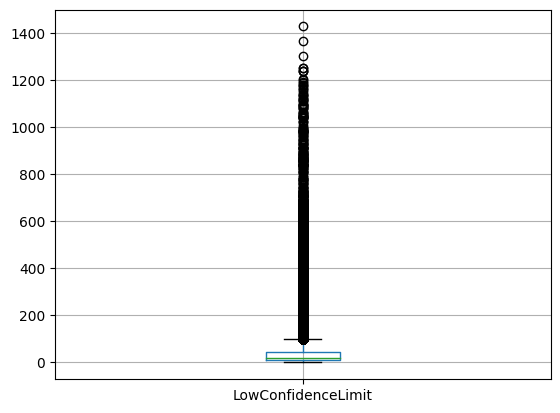

In [88]:
df.boxplot('LowConfidenceLimit')

<Axes: >

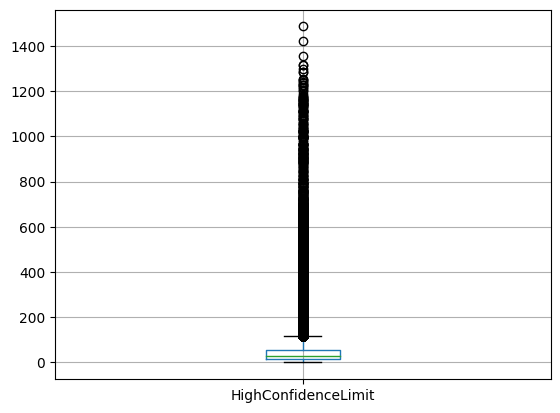

In [89]:
df.boxplot('HighConfidenceLimit')

<Axes: >

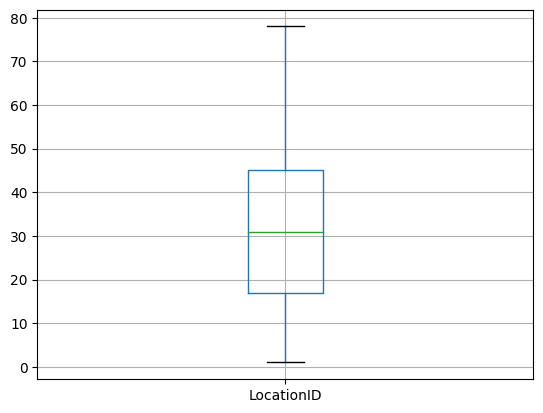

In [90]:
df.boxplot('LocationID')

In [91]:
#normalizing  the values
from scipy.stats import zscore
col = ['LowConfidenceLimit','HighConfidenceLimit',]
for i in col:
  z = np.abs(zscore(df[i]))
  df = df[(z<3)]
df.describe()

,YearStart,DataValue,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,298680.000000,2.986800e+05,298680.000000,298680.000000,298680.000000
mean,2020.075522,4.011856e+02,28.507757,36.964552,31.266442
std,1.490236,1.200177e+04,28.109054,31.784062,17.871076
min,2015.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,2019.000000,1.245844e+01,8.937391,14.100000,17.000000
50%,2020.000000,2.690000e+01,18.000000,27.600000,31.000000
75%,2021.000000,5.520000e+01,38.571975,52.100000,45.000000
max,2022.000000,2.925456e+06,173.400000,174.500000,78.000000


<Axes: >

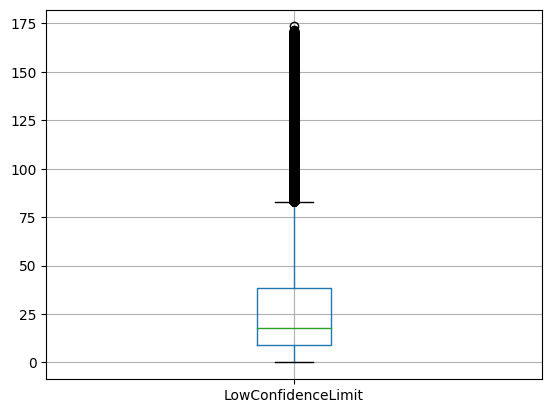

In [92]:
df.boxplot('LowConfidenceLimit')

In [93]:
encoder = LabelEncoder()
col = ['LocationDesc','DataSource','Question','DataValueUnit','DataValueType','StratificationCategory1','Stratification1','Topic']
for i in col:
  df[i] = encoder.fit_transform(df[i])
df.head()

,YearStart,LocationDesc,DataSource,Question,DataValueUnit,DataValueType,DataValue,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,Topic
0,2019,10,3,2,0,7,44.0,41.0,47.1,0,10,13,9
1,2019,11,3,5,0,7,15.9,13.3,18.9,4,15,66,1
2,2019,11,3,61,0,7,30.0,26.2,34.0,4,22,66,11
3,2019,20,3,39,0,7,11.4,10.2,12.7,4,22,23,8
4,2019,29,8,68,2,9,78.0,77.8,78.2,2,24,32,10


In [94]:
df.dtypes

YearStart                    int64
LocationDesc                 int64
DataSource                   int64
Question                     int64
DataValueUnit                int64
DataValueType                int64
DataValue                  float64
LowConfidenceLimit         float64
HighConfidenceLimit        float64
StratificationCategory1      int64
Stratification1              int64
LocationID                   int64
Topic                        int64
dtype: object

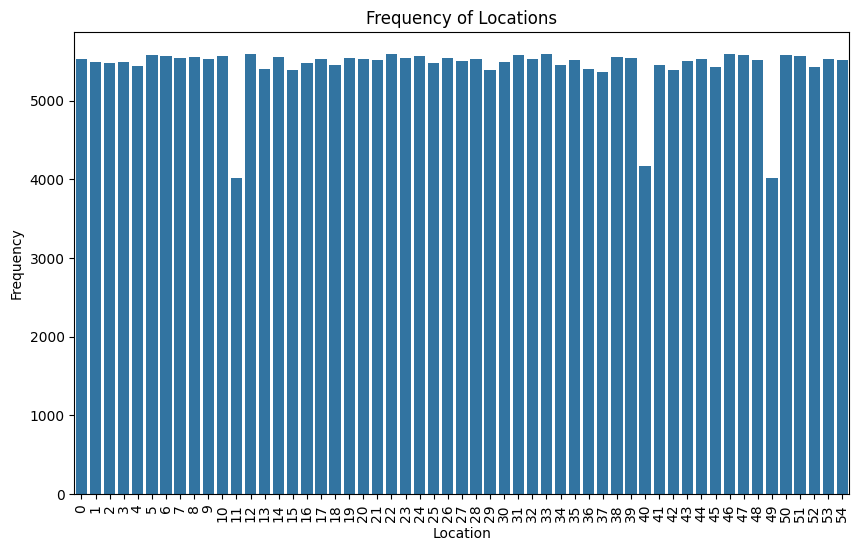

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='LocationDesc')
plt.title('Frequency of Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

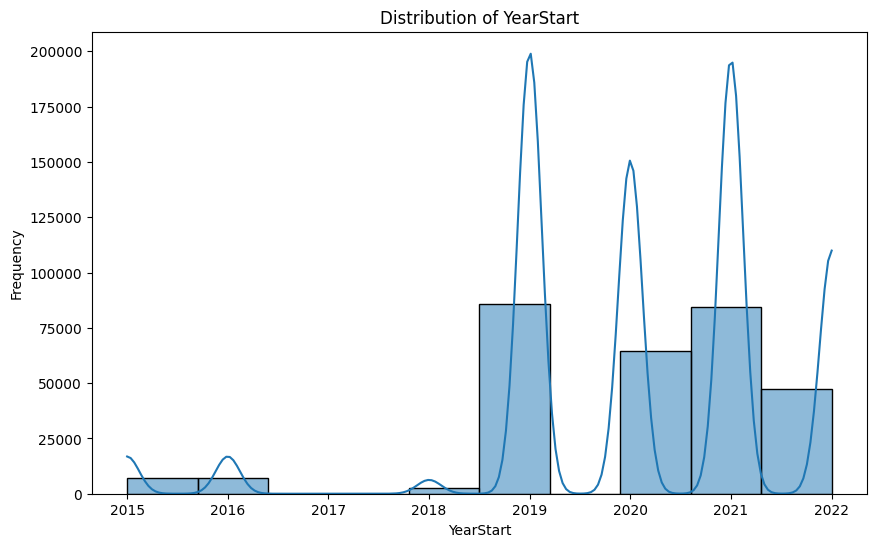

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='YearStart', bins=10, kde=True)
plt.title('Distribution of YearStart')
plt.xlabel('YearStart')
plt.ylabel('Frequency')
plt.show()


<ipython-input-97-887c086c28f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Question'])


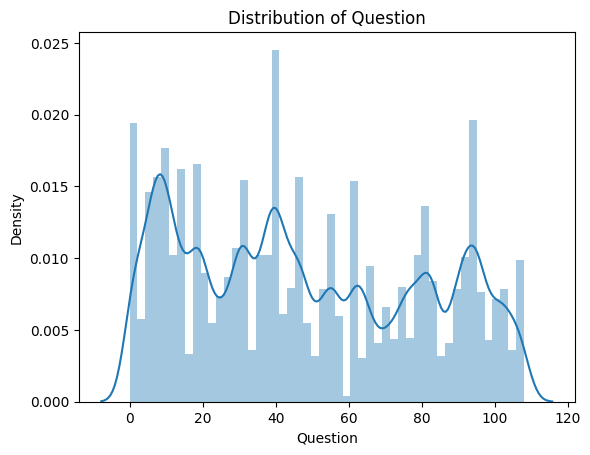

In [97]:
sns.distplot(df['Question'])
plt.title('Distribution of Question')
plt.show()

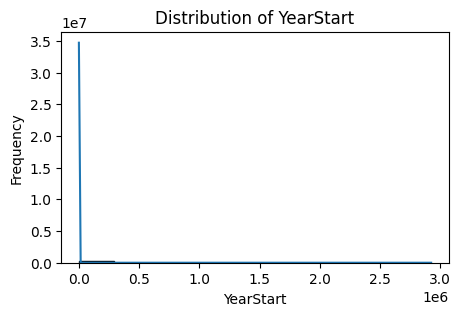

In [98]:


plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='DataValue', bins=10, kde=True)
plt.title('Distribution of YearStart')
plt.xlabel('YearStart')
plt.ylabel('Frequency')
plt.show()

In [99]:
df.corr()

,YearStart,LocationDesc,DataSource,Question,DataValueUnit,DataValueType,DataValue,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,Topic
YearStart,1.000000,0.004752,-0.371087,0.020301,-0.404582,-0.142314,-0.011620,-0.052473,-0.036263,-0.049607,-0.011883,0.022346,0.195909
LocationDesc,0.004752,1.000000,-0.005280,0.002352,-0.009943,-0.003002,0.013514,0.001557,-0.001702,-0.000660,0.000088,0.905599,0.003978
DataSource,-0.371087,-0.005280,1.000000,-0.174396,0.442469,0.342951,0.010748,0.110683,0.114165,-0.020379,0.024447,-0.027902,-0.061823
Question,0.020301,0.002352,-0.174396,1.000000,-0.229521,-0.049516,-0.000277,0.258245,0.273806,0.033595,0.024522,0.010453,0.352866
DataValueUnit,-0.404582,-0.009943,0.442469,-0.229521,1.000000,0.070757,0.007745,0.127210,0.095231,0.050048,-0.003246,-0.043547,-0.363617
DataValueType,-0.142314,-0.003002,0.342951,-0.049516,0.070757,1.000000,0.039197,0.115057,0.104381,-0.206666,-0.143444,-0.018063,-0.052635
DataValue,-0.011620,0.013514,0.010748,-0.000277,0.007745,0.039197,1.000000,0.049421,0.046928,0.002419,0.014366,0.016195,-0.017932
LowConfidenceLimit,-0.052473,0.001557,0.110683,0.258245,0.127210,0.115057,0.049421,1.000000,0.975585,0.028951,0.033887,-0.013038,0.034351
HighConfidenceLimit,-0.036263,-0.001702,0.114165,0.273806,0.095231,0.104381,0.046928,0.975585,1.000000,0.041127,0.016809,-0.012361,0.050377
StratificationCategory1,-0.049607,-0.000660,-0.020379,0.033595,0.050048,-0.206666,0.002419,0.028951,0.041127,1.000000,0.464128,-0.003080,-0.002381


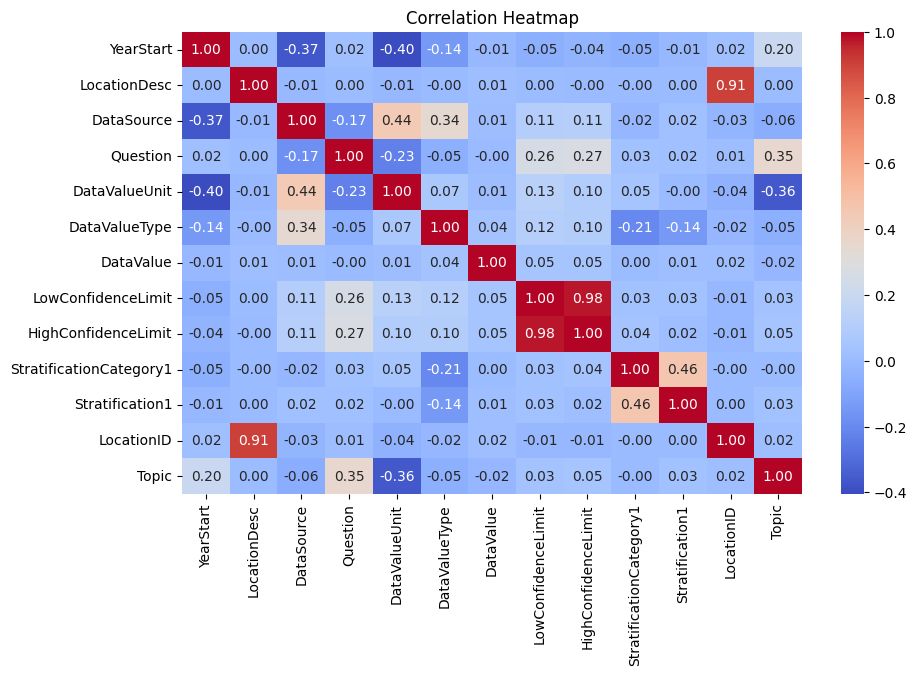

In [100]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm' ,fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [101]:
df.shape

(298680, 13)

In [102]:
# Assuming your DataFrame is named df, and you want to save it to a file named 'output.csv'
df.to_csv('modefied _Copy_of_U.S._Chronic_Disease_Indicators.csv', index=False)


In [103]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
selected_features = ['Question', 'DataValueUnit', 'StratificationCategory1', 'LocationID']

# Selecting features
X = df[selected_features]  # Feature(s)
y = df["Topic"]        # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9999832596759073

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5129
           1       1.00      1.00      1.00      3926
           2       1.00      1.00      1.00      2038
           3       1.00      1.00      1.00      3844
           4       1.00      1.00      1.00      5189
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00      4649
           7       1.00      1.00      1.00      2012
           8       1.00      1.00      1.00      3343
           9       1.00      1.00      1.00      1021
          10       1.00      1.00      1.00      5222
          11       1.00      1.00      1.00      3768
          12       1.00      1.00      1.00       223
          13       1.00      1.00      1.00      3439
          14       1.00      1.00      1.00      5197
          15       1.00      1.00      1.00      2611
          16       1.00     